# Importing Librarys and Data 

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

df=pd.read_csv("C:\\Users\\mohamed khaled\\Downloads\\Final\\Numeric\\weather_australia.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Introduction to Dataset

# DataSet Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df['Location'].nunique()

49

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# Feature Selection

In [7]:
df=df[["Location","Date","MinTemp","MaxTemp","Rainfall","Evaporation","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Cloud9am","Cloud3pm","RainTomorrow"]]

In [8]:
df.dropna(inplace=True)
df.shape

(63941, 14)

In [9]:
df[["year","month", "day"]] = df["Date"].str.split("-", expand = True)
df.drop(columns=["Date"],inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63941 entries, 6049 to 143186
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       63941 non-null  object 
 1   MinTemp        63941 non-null  float64
 2   MaxTemp        63941 non-null  float64
 3   Rainfall       63941 non-null  float64
 4   Evaporation    63941 non-null  float64
 5   WindGustSpeed  63941 non-null  float64
 6   WindSpeed9am   63941 non-null  float64
 7   WindSpeed3pm   63941 non-null  float64
 8   Humidity9am    63941 non-null  float64
 9   Humidity3pm    63941 non-null  float64
 10  Cloud9am       63941 non-null  float64
 11  Cloud3pm       63941 non-null  float64
 12  RainTomorrow   63941 non-null  object 
 13  year           63941 non-null  object 
 14  month          63941 non-null  object 
 15  day            63941 non-null  object 
dtypes: float64(11), object(5)
memory usage: 8.3+ MB


In [11]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainTomorrow', 'year', 'month',
       'day'],
      dtype='object')

In [12]:
df=df.reindex(columns=["Location",'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm','year', 'month', 'day','RainTomorrow'])
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,year,month,day,RainTomorrow
6049,Cobar,17.9,35.2,0.0,12.0,48.0,6.0,20.0,20.0,13.0,2.0,5.0,2009,01,01,No
6050,Cobar,18.4,28.9,0.0,14.8,37.0,19.0,19.0,30.0,8.0,1.0,1.0,2009,01,02,No
6052,Cobar,19.4,37.6,0.0,10.8,46.0,30.0,15.0,42.0,22.0,1.0,6.0,2009,01,04,No
6053,Cobar,21.9,38.4,0.0,11.4,31.0,6.0,6.0,37.0,22.0,1.0,5.0,2009,01,05,No
6054,Cobar,24.2,41.0,0.0,11.2,35.0,17.0,13.0,19.0,15.0,1.0,6.0,2009,01,06,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143181,Katherine,18.2,35.5,0.0,5.0,41.0,4.0,22.0,65.0,27.0,0.0,1.0,2015,07,26,No
143182,Katherine,22.6,33.6,0.0,8.0,46.0,17.0,26.0,53.0,40.0,6.0,6.0,2015,07,27,No
143183,Katherine,17.4,30.7,0.0,10.8,46.0,22.0,19.0,28.0,42.0,0.0,0.0,2015,07,28,No
143185,Katherine,13.3,32.0,0.0,5.8,43.0,15.0,22.0,73.0,28.0,0.0,1.0,2015,07,30,No


checking if there are an outliers

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm
count,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000,63941.000000
mean,13.347003,24.240630,2.113713,5.573646,40.443471,15.211414,19.422577,65.977933,49.213025,4.203985,4.317339
std,6.500264,7.064992,6.920095,4.114119,13.281530,8.489483,8.518373,18.840570,20.514628,2.832837,2.667011
min,-6.700000,4.100000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.400000,18.600000,0.000000,2.800000,31.000000,9.000000,13.000000,55.000000,35.000000,1.000000,2.000000
50%,13.100000,23.900000,0.000000,4.900000,39.000000,15.000000,19.000000,67.000000,50.000000,5.000000,5.000000
75%,18.400000,29.700000,0.600000,7.400000,48.000000,20.000000,24.000000,80.000000,63.000000,7.000000,7.000000
max,31.400000,48.100000,206.200000,82.400000,124.000000,67.000000,76.000000,100.000000,100.000000,8.000000,9.000000


In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Label Encoding 

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# One hot encoding

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
print(X.shape)

(63941, 43)


# Splitting Data into train , test and valid

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.05,random_state=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2,random_state=1)

# Feature Scailing

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# SVC

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Accuracy Score and Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy = " + str((round(accuracy_score(y_test, y_pred),6)*100))+"%")

[[9252  354]
 [1301 1242]]
Accuracy = 86.3775%


In [24]:
X_valid = sc.fit_transform(X_valid)
valid_pred=classifier.predict(X_valid)
cm = confusion_matrix(y_valid, valid_pred)
print(cm)
print("Accuracy = " +str(round(accuracy_score(y_valid, valid_pred),6)*100)+"%")

[[2371   90]
 [ 414  323]]
Accuracy = 84.2402%


# ROC Curve

<function matplotlib.pyplot.show(close=None, block=None)>

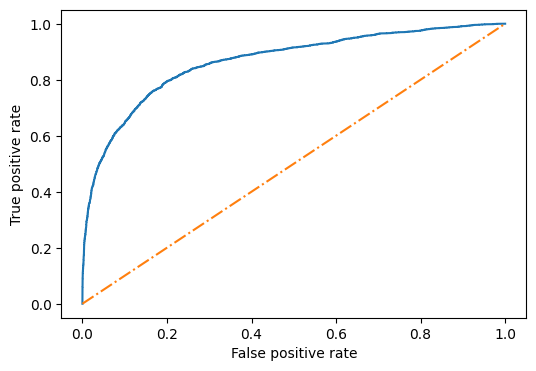

In [25]:
y_pred_svm=classifier.decision_function(X_test)
from sklearn.metrics import roc_curve
fpr,tpr ,thresholds =roc_curve(y_test,y_pred_svm)
plt.figure(figsize=(6,4))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,tpr,linestyle='-')
plt.plot([0,1],[0,1],linestyle='dashdot')
plt.show

# Learning Curve

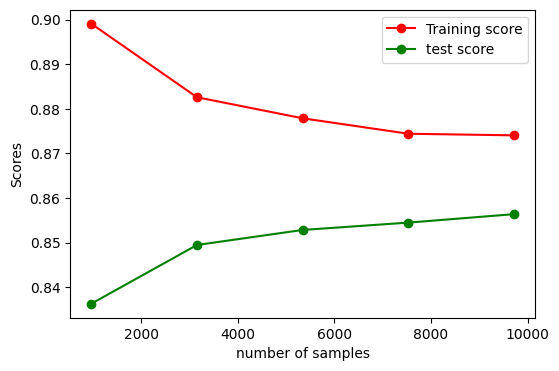

In [26]:
from sklearn.model_selection import learning_curve

plt.figure(figsize=(6,4))

train_sizes=np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, test_scores= learning_curve(classifier,X_test,y_test,n_jobs=4,train_sizes=train_sizes)
train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

plt.xlabel("number of samples")
plt.ylabel("Scores")
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="test score")
plt.legend()


plt.show()

# ANN

In [27]:
# setting the seed
np.random.seed(0)
tf.random.set_seed(0)

In [28]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=15, activation='linear'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True, mode='max')
checkpoint = tf.keras.callbacks.ModelCheckpoint(monitor='val_accuracy', filepath="weights.h5", verbose=1, save_best_only=True, mode='max')

In [30]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [31]:
train = model.fit(X_train, y_train, epochs=500, batch_size=500, validation_split=0.2, callbacks=[checkpoint, early_stopping], verbose=1)

Epoch 1/500
77/78 [============================>.] - ETA: 0s - loss: 0.6069 - accuracy: 0.6760
Epoch 1: val_accuracy improved from -inf to 0.82344, saving model to weights.h5
78/78 [==============================] - 1s 4ms/step - loss: 0.6054 - accuracy: 0.6771 - val_loss: 0.4201 - val_accuracy: 0.8234
Epoch 2/500
43/78 [===============>..............] - ETA: 0s - loss: 0.4026 - accuracy: 0.8267
Epoch 2: val_accuracy improved from 0.82344 to 0.84700, saving model to weights.h5
78/78 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8341 - val_loss: 0.3567 - val_accuracy: 0.8470
Epoch 3/500
39/78 [==============>...............] - ETA: 0s - loss: 0.3637 - accuracy: 0.8455
Epoch 3: val_accuracy improved from 0.84700 to 0.85287, saving model to weights.h5
78/78 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8461 - val_loss: 0.3421 - val_accuracy: 0.8529
Epoch 4/500
41/78 [==============>...............] - ETA: 0s - loss: 0.3467 - accu

# roc curve

380/380 [==============================] - 0s 866us/step


<function matplotlib.pyplot.show(close=None, block=None)>

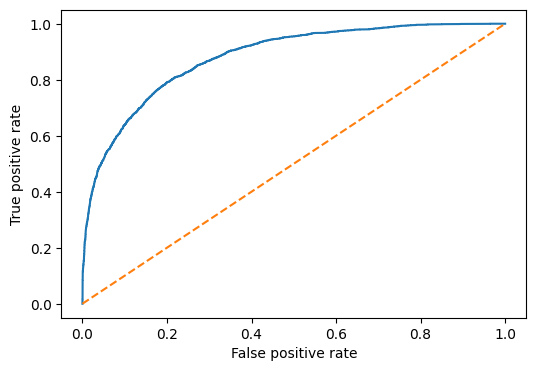

In [32]:
y_pred = model.predict(X_test)

from sklearn.metrics import roc_curve
fpr,tpr ,thresholds =roc_curve(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(fpr,tpr,linestyle='-')
plt.plot([0,1],[0,1],linestyle='--')
plt.show


# Loss curve

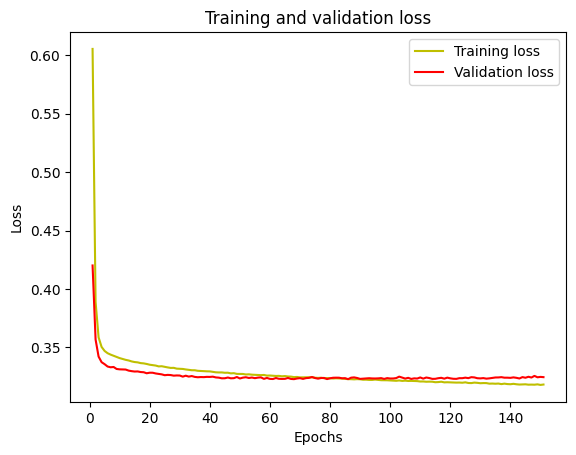

In [33]:
#plot the training and validation accuracy and loss at each epoch
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy Score and Confusion Matrix

## Accuracy on the test set

In [41]:
model.load_weights('C:\\Users\\mohamed khaled\\Downloads\\Final\\Numeric\\weights.h5')


test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
y_predict=(y_pred>0.5)
cm2=confusion_matrix(y_test,y_predict)
print(cm2)
print("accuracy = ",round(test_acc,6)*100,"%")

380/380 - 0s - loss: 0.3280 - accuracy: 0.8620 - 311ms/epoch - 818us/step
[[9035  571]
 [1156 1387]]
accuracy =  86.2046 %


## Accuracy on the validation set


In [43]:
y_val_pred = model.predict(X_valid)
val_loss, val_acc = model.evaluate(X_valid,  y_valid, verbose=2)
y_val_pred=(y_val_pred>0.5)
cm2=confusion_matrix(y_valid,y_val_pred)
print(cm2)
print("accuracy = ",round(test_acc,6)*100,"%")

100/100 [==============================] - 0s 816us/step
100/100 - 0s - loss: 0.3581 - accuracy: 0.8424 - 86ms/epoch - 856us/step
[[2337  124]
 [ 380  357]]
accuracy =  86.2046 %
